### Importing the libraries  :

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###  Loading the dataset :

In [7]:
path = ('E:/Assignments/NLP/NLP-TM (1)/Data.csv')

In [8]:
df = pd.read_csv(path)
df.head()

tweet_id sentiment                                               text  \
0         1   neutral                               What @dhepburn said.   
1         2  positive  plus you've added commercials to the experienc...   
2         3   neutral  I didn't today... Must mean I need to take ano...   
3         4  negative  it's really aggressive to blast obnoxious "ent...   
4         5  negative           and it's a really big bad thing about it   

      tweet_created tweet_location               user_timezone  
0  24/02/2015 11:35            NaN  Eastern Time (US & Canada)  
1  24/02/2015 11:15            NaN  Pacific Time (US & Canada)  
2  24/02/2015 11:15      Lets Play  Central Time (US & Canada)  
3  24/02/2015 11:15            NaN  Pacific Time (US & Canada)  
4  24/02/2015 11:14            NaN  Pacific Time (US & Canada)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        14640 non-null  int64 
 1   sentiment       14640 non-null  object
 2   text            14640 non-null  object
 3   tweet_created   14640 non-null  object
 4   tweet_location  9907 non-null   object
 5   user_timezone   9820 non-null   object
dtypes: int64(1), object(5)
memory usage: 686.4+ KB


In [10]:
df.describe().transpose()

count    mean          std  min      25%     50%       75%  \
tweet_id  14640.0  7320.5  4226.348306  1.0  3660.75  7320.5  10980.25   

              max  
tweet_id  14640.0

In [14]:
df = df[['sentiment','text']]

### Data Preprocessing :

In [15]:
count = df.isnull().sum().sort_values(ascending=True)
percentage = ((df.isnull().sum()/len(df)*100)).sort_values(ascending=True)
missing_data = pd.DataFrame(list(zip(count, percentage)), columns=['Count', 'Percentage_%'])

print('Count and percentage of missing values for the column : \n', missing_data)

Count and percentage of missing values for the column : 
    Count  Percentage_%
0      0           0.0
1      0           0.0


In [16]:
response = df['sentiment'].value_counts().to_frame().reset_index()
response

index  sentiment
0  negative       9178
1   neutral       3099
2  positive       2363

In [17]:
response.rename(columns={'sentiment':'Count', 'index':'Sentiment'}, inplace=True)
response

Sentiment  Count
0  negative   9178
1   neutral   3099
2  positive   2363

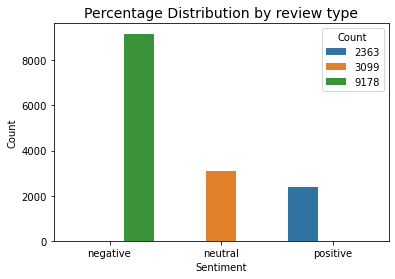

In [18]:
plt.title('Percentage Distribution by review type', size=14);
sns.barplot(x=response['Sentiment'], y=response['Count'], hue=response['Count'], data=response);

#### Apply first level cleaning :

In [80]:
import re
import string

In [19]:
text = df['text']

In [20]:
text.head()

0                                 What @dhepburn said.
1    plus you've added commercials to the experienc...
2    I didn't today... Must mean I need to take ano...
3    it's really aggressive to blast obnoxious "ent...
4             and it's a really big bad thing about it
Name: text, dtype: object

In [21]:
text = text.str.replace('\W', ' ')

<ipython-input-21-bea5c837a5e4>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  text = text.str.replace('\W', ' ')


In [23]:
text = text.str.lower()

In [24]:
text = text.str.strip()

In [25]:
text.to_frame()

text
0                                    what  dhepburn said
1      plus you ve added commercials to the experienc...
2      i didn t today    must mean i need to take ano...
3      it s really aggressive to blast obnoxious  ent...
4               and it s a really big bad thing about it
...                                                  ...
14635  thank you we got on a different flight to chicago
14636  leaving over 20 minutes late flight  no warnin...
14637    please bring american airlines to  blackberry10
14638  you have my money  you change my flight  and d...
14639  we have 8 ppl so we need 2 know how many seats...

[14640 rows x 1 columns]

In [36]:
import os
import re
import nltk
import nltk.corpus
from nltk.tokenize import word_tokenize

In [37]:
data = text.to_string()

In [40]:
data = re.sub(r"\d+", "", data)

In [43]:
data = data.replace('...','')

#### Tokenization :

In [48]:
text_token = word_tokenize(data)
text_token

['what',
 'dhepburn',
 'said',
 'plus',
 'you',
 've',
 'added',
 'commercials',
 'to',
 'the',
 'experienc',
 'i',
 'didn',
 't',
 'today',
 'must',
 'mean',
 'i',
 'need',
 'to',
 'take',
 'ano',
 'it',
 's',
 'really',
 'aggressive',
 'to',
 'blast',
 'obnoxious',
 'ent',
 'and',
 'it',
 's',
 'a',
 'really',
 'big',
 'bad',
 'thing',
 'about',
 'it',
 'seriously',
 'would',
 'pay',
 'a',
 'flight',
 'for',
 'seats',
 'tha',
 'yes',
 'nearly',
 'every',
 'time',
 'i',
 'fly',
 'vx',
 'this',
 '__ar',
 'worm',
 'really',
 'missed',
 'a',
 'prime',
 'opportunity',
 'for',
 'men',
 'with',
 'well',
 'i',
 'didn',
 't_but',
 'now',
 'i',
 'do',
 'd',
 'it',
 'was',
 'amazing',
 'and',
 'arrived',
 'an',
 'hour',
 'early',
 'you',
 'did',
 'you',
 'know',
 'that',
 'suicide',
 'is',
 'the',
 'second',
 'leadin',
 'i',
 'lt',
 'pretty',
 'graphics',
 'so',
 'much',
 'better',
 'than',
 'm',
 'this',
 'is',
 'such',
 'a',
 'great',
 'deal',
 'already',
 'thinking',
 'ab',
 'virginmedia',
 

#### POS Tagging :

In [49]:
for token in text_token:
    print(nltk.pos_tag([token]))

[('what', 'WP')]
[('dhepburn', 'NN')]
[('said', 'VBD')]
[('plus', 'CC')]
[('you', 'PRP')]
[('ve', 'NN')]
[('added', 'VBD')]
[('commercials', 'NNS')]
[('to', 'TO')]
[('the', 'DT')]
[('experienc', 'NN')]
[('i', 'NN')]
[('didn', 'NN')]
[('t', 'NN')]
[('today', 'NN')]
[('must', 'MD')]
[('mean', 'NN')]
[('i', 'NN')]
[('need', 'NN')]
[('to', 'TO')]
[('take', 'VB')]
[('ano', 'NN')]
[('it', 'PRP')]
[('s', 'NN')]
[('really', 'RB')]
[('aggressive', 'JJ')]
[('to', 'TO')]
[('blast', 'NN')]
[('obnoxious', 'JJ')]
[('ent', 'NN')]
[('and', 'CC')]
[('it', 'PRP')]
[('s', 'NN')]
[('a', 'DT')]
[('really', 'RB')]
[('big', 'JJ')]
[('bad', 'JJ')]
[('thing', 'NN')]
[('about', 'IN')]
[('it', 'PRP')]
[('seriously', 'RB')]
[('would', 'MD')]
[('pay', 'NN')]
[('a', 'DT')]
[('flight', 'NN')]
[('for', 'IN')]
[('seats', 'NNS')]
[('tha', 'NN')]
[('yes', 'NNS')]
[('nearly', 'RB')]
[('every', 'DT')]
[('time', 'NN')]
[('i', 'NN')]
[('fly', 'NN')]
[('vx', 'NN')]
[('this', 'DT')]
[('__ar', 'NN')]
[('worm', 'NN')]
[('really

#### POS Entity recognition :

In [50]:
from nltk import ne_chunk

In [51]:
NE_tags = nltk.pos_tag(text_token)
NE_tags

[('what', 'WP'),
 ('dhepburn', 'NN'),
 ('said', 'VBD'),
 ('plus', 'CC'),
 ('you', 'PRP'),
 ('ve', 'VBP'),
 ('added', 'JJ'),
 ('commercials', 'NNS'),
 ('to', 'TO'),
 ('the', 'DT'),
 ('experienc', 'NN'),
 ('i', 'NN'),
 ('didn', 'VBP'),
 ('t', 'NN'),
 ('today', 'NN'),
 ('must', 'MD'),
 ('mean', 'VB'),
 ('i', 'NNS'),
 ('need', 'VBP'),
 ('to', 'TO'),
 ('take', 'VB'),
 ('ano', 'NN'),
 ('it', 'PRP'),
 ('s', 'VBZ'),
 ('really', 'RB'),
 ('aggressive', 'JJ'),
 ('to', 'TO'),
 ('blast', 'VB'),
 ('obnoxious', 'JJ'),
 ('ent', 'NN'),
 ('and', 'CC'),
 ('it', 'PRP'),
 ('s', 'VBD'),
 ('a', 'DT'),
 ('really', 'RB'),
 ('big', 'JJ'),
 ('bad', 'JJ'),
 ('thing', 'NN'),
 ('about', 'IN'),
 ('it', 'PRP'),
 ('seriously', 'RB'),
 ('would', 'MD'),
 ('pay', 'VB'),
 ('a', 'DT'),
 ('flight', 'NN'),
 ('for', 'IN'),
 ('seats', 'NNS'),
 ('tha', 'VBP'),
 ('yes', 'RB'),
 ('nearly', 'RB'),
 ('every', 'DT'),
 ('time', 'NN'),
 ('i', 'JJ'),
 ('fly', 'VBP'),
 ('vx', 'NN'),
 ('this', 'DT'),
 ('__ar', 'JJ'),
 ('worm', 'NN'),
 ('

In [52]:
Ne_ner = ne_chunk(NE_tags)
print(Ne_ner)

(S
  what/WP
  dhepburn/NN
  said/VBD
  plus/CC
  you/PRP
  ve/VBP
  added/JJ
  commercials/NNS
  to/TO
  the/DT
  experienc/NN
  i/NN
  didn/VBP
  t/NN
  today/NN
  must/MD
  mean/VB
  i/NNS
  need/VBP
  to/TO
  take/VB
  ano/NN
  it/PRP
  s/VBZ
  really/RB
  aggressive/JJ
  to/TO
  blast/VB
  obnoxious/JJ
  ent/NN
  and/CC
  it/PRP
  s/VBD
  a/DT
  really/RB
  big/JJ
  bad/JJ
  thing/NN
  about/IN
  it/PRP
  seriously/RB
  would/MD
  pay/VB
  a/DT
  flight/NN
  for/IN
  seats/NNS
  tha/VBP
  yes/RB
  nearly/RB
  every/DT
  time/NN
  i/JJ
  fly/VBP
  vx/NN
  this/DT
  __ar/JJ
  worm/NN
  really/RB
  missed/VBD
  a/DT
  prime/JJ
  opportunity/NN
  for/IN
  men/NNS
  with/IN
  well/RB
  i/JJ
  didn/NNS
  t_but/VBP
  now/RB
  i/RB
  do/VBP
  d/VB
  it/PRP
  was/VBD
  amazing/VBG
  and/CC
  arrived/VBD
  an/DT
  hour/NN
  early/RB
  you/PRP
  did/VBD
  you/PRP
  know/VBP
  that/DT
  suicide/NN
  is/VBZ
  the/DT
  second/JJ
  leadin/NN
  i/NN
  lt/VBP
  pretty/RB
  graphics/NNS
  so/RB
  m

### LSA/LDA :

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from nltk.corpus import stopwords

In [60]:
stop_words=set(nltk.corpus.stopwords.words('english'))

In [61]:
vect =TfidfVectorizer(stop_words=stop_words,max_features=1000)

In [62]:
vect_text=vect.fit_transform(text)

In [63]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
lsa_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=10, random_state=42)

In [ ]:
lsa_top=lsa_model.fit_transform(vect_text)

In [64]:
print(vect_text.shape)
print(vect_text)

(14640, 1000)
  (0, 762)	1.0
  (1, 319)	0.630995400465353
  (1, 685)	0.7757865715463041
  (2, 903)	0.36365762179383004
  (2, 73)	0.3460565285940856
  (2, 853)	0.3473637771069066
  (2, 607)	0.29812443968298435
  (2, 565)	0.45406387021469885
  (2, 604)	0.4827225407775229
  (2, 885)	0.31506061057729534
  (3, 528)	0.5467758537028471
  (3, 71)	0.3576770562892844
  (3, 301)	0.6292727710851772
  (3, 717)	0.4208551636638634
  (4, 870)	0.5487448835531543
  (4, 116)	0.4685686207154137
  (4, 128)	0.5463362674039549
  (4, 717)	0.4252519057855051
  (5, 366)	0.2953904629642425
  (5, 775)	0.3235953482248259
  (5, 352)	0.15005236447563336
  (5, 22)	0.329145150513135
  (5, 661)	0.34687672475261466
  (5, 987)	0.26207547647085083
  (5, 787)	0.37780429318434355
  :	:
  (14636, 513)	0.2888180300009821
  (14636, 153)	0.262925884085828
  (14636, 352)	0.22895566044074803
  (14637, 68)	0.5393317260383654
  (14637, 142)	0.5831505130514879
  (14637, 56)	0.48105250874035677
  (14637, 683)	0.3710057307520637
  (14

In [ ]:
idf=vect.idf_

#### Latent Semantic Analysis (LSA)

In [65]:
from sklearn.decomposition import TruncatedSVD

In [66]:
lsa_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=10, random_state=42)

In [67]:
lsa_top=lsa_model.fit_transform(vect_text)

In [68]:
print(lsa_top)

[[ 0.01867744 -0.01302929 -0.00364384 ... -0.00298502  0.00259158
  -0.0303842 ]
 [ 0.02021641 -0.00948252 -0.00076475 ... -0.0084093  -0.02196512
  -0.04040651]
 [ 0.08473015 -0.04862828 -0.01164545 ...  0.02126596 -0.02963053
  -0.0474586 ]
 ...
 [ 0.04975753 -0.01237091 -0.00316785 ...  0.14629525 -0.03523807
  -0.05749225]
 [ 0.13343585 -0.09300556 -0.05691394 ...  0.05082981  0.00247482
   0.03917467]
 [ 0.19834674 -0.12602816 -0.07352184 ...  0.0646785  -0.0593737
  -0.01475762]]


In [69]:
print(lsa_top.shape)

(14640, 10)


In [70]:
l=lsa_top[0]
print("Document 0 :")
for i,topic in enumerate(l):
  print("Topic ",i," : ",topic*100)

Document 0 :
Topic  0  :  1.867744108466597
Topic  1  :  -1.3029294185204183
Topic  2  :  -0.36438417184983646
Topic  3  :  -0.005482111084598171
Topic  4  :  2.0154341939742353
Topic  5  :  -1.9661552673188996
Topic  6  :  -1.6648784993343924
Topic  7  :  -0.29850243410260624
Topic  8  :  0.25915839649082784
Topic  9  :  -3.038419563282282


In [71]:
print(lsa_model.components_.shape) # (no_of_topics*no_of_words)
print(lsa_model.components_)

(10, 1000)
[[ 3.82004070e-03  2.23771036e-02  7.18533974e-03 ...  2.00720164e-02
   3.99568683e-03  4.32357125e-03]
 [ 8.96484886e-04 -1.28637585e-02 -4.47820127e-03 ... -9.78549246e-03
  -1.11317703e-03 -1.54334603e-03]
 [-6.32920656e-04 -4.59063745e-03 -8.92941558e-04 ... -3.65592519e-03
   2.51325289e-04 -3.74131585e-04]
 ...
 [-1.92450554e-03 -1.61261306e-02 -2.53973539e-03 ...  4.75606643e-04
  -1.09426949e-03 -7.57369158e-04]
 [-9.29095936e-04  1.94592950e-02  3.76977443e-03 ...  5.91149316e-05
  -1.00977355e-03  5.73204050e-04]
 [-3.52922758e-03 -1.25467539e-02 -2.38060777e-03 ... -2.01606648e-02
  -1.78642557e-03 -4.66810363e-03]]


In [72]:
vocab = vect.get_feature_names()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
flight co http thanks cancelled get help service flightled hold 

Topic 1: 
co http fleek fleet jetblue rt __jetblue ceo https wall 

Topic 2: 
thanks thank much great service dm sent response customer awesome 

Topic 3: 
thank much great service customer response dm sent ok appreciate 

Topic 4: 
service customer get call help worst hold ever phone please 

Topic 5: 
service customer flight cancelled flightled worst great ever delayed thanks 

Topic 6: 
cancelled flightled flights help flighted hold tomorrow need get please 

Topic 7: 
dm please help flight follow sent need customer service number 

Topic 8: 
hold hours hour minutes waiting call still help phone sitting 

Topic 9: 
get hold flight help service customer trying call hours phone 



#### Latent Dirichlet Allocation (LDA) :

In [73]:
from sklearn.decomposition import LatentDirichletAllocation

In [74]:
lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=42,max_iter=1) 

In [76]:
lda_top=lda_model.fit_transform(vect_text)

In [77]:
print(lda_top.shape) 

(14640, 10)


In [78]:
print(lda_top)

[[0.05       0.05       0.05       ... 0.05       0.05       0.05      ]
 [0.04155014 0.04155959 0.04154926 ... 0.62595819 0.04156926 0.04155729]
 [0.02772556 0.13509116 0.64309793 ... 0.02772722 0.02772484 0.02772842]
 ...
 [0.03361864 0.03362037 0.35438793 ... 0.03361965 0.03361864 0.03361972]
 [0.0297763  0.19640877 0.02977608 ... 0.02977614 0.42185427 0.02977779]
 [0.0230521  0.02305254 0.02305749 ... 0.02305884 0.11465829 0.0230575 ]]


In [79]:
sum=0
for i in lda_top[0]:
  sum=sum+i
print(sum)  

1.0000000000000002


In [80]:
print("Document 0: ")
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

Document 0: 
Topic  0 :  5.0000000043781965 %
Topic  1 :  5.00000000505934 %
Topic  2 :  5.0000000043462265 %
Topic  3 :  54.99946139039924 %
Topic  4 :  5.00000000431244 %
Topic  5 :  5.000000004495437 %
Topic  6 :  5.00053857797199 %
Topic  7 :  5.000000002946189 %
Topic  8 :  5.0000000037768695 %
Topic  9 :  5.000000002314085 %


In [81]:
print(lda_model.components_)

[[11.01280742  0.10044163 11.7618701  ...  0.10099378  0.11838631
   0.10049157]
 [ 0.10041434  0.10041445  0.10028018 ...  0.10041111  0.1003973
  16.06417988]
 [ 0.10030221  0.1008158   0.10043535 ...  0.10061499  0.10037649
   0.10039105]
 ...
 [ 0.10061361 57.60237753  0.10046813 ...  0.1004677   0.10035147
   0.10078116]
 [ 0.10068378  0.10081071  0.10082133 ...  0.10058697  0.10091683
   0.10117999]
 [ 0.10034763  0.10250394  6.83573926 ... 44.63969165  0.10032851
   0.10039224]]


In [82]:
print(lda_model.components_.shape)

(10, 1000)


In [83]:
vocab = vect.get_feature_names()

In [84]:
for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
luggage hold tell hour done call clt late times got 

Topic 1: 
usairways guys like name talk made airways awesome thanks twitter 

Topic 2: 
thank americanair please follow come good let always great __ 

Topic 3: 
flight cancelled flightled call get help dfw tomorrow need flighted 

Topic 4: 
thanks yes sure american fly home dallas reservations jetblue able 

Topic 5: 
http co two keep work nice money look tried stranded 

Topic 6: 
service worst ever customers customer phl best airline dca check 

Topic 7: 
aa response rebooked days sent line dm email bag miles 

Topic 8: 
baggage answer well one rude understand change think way americanairlines 

Topic 9: 
flight plane waiting minutes right weather hours gate much delayed 



In [89]:
from wordcloud import WordCloud

In [88]:
def draw_word_cloud(index):
  imp_words_topic=""
  comp=lda_model.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()

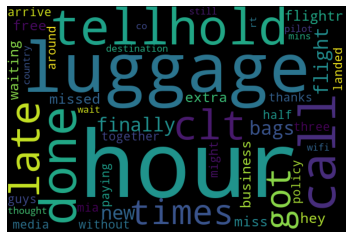

In [90]:
draw_word_cloud(0)